In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

# ADR1.F

In [38]:
# declare arrays

nx = 100
nm = 4
x = np.zeros(nx)
f = np.zeros(nx+2)
fnew = np.zeros(nx+2)
fmom = np.zeros(nm+1)
hmom = np.zeros(nm+1)
chal = np.zeros(nx)
chbl = np.zeros(nx)

main = []
# baseline parameters
Nsteps = 10000
nout = 100
sizex = 1.0
dx = sizex/float(nx-1)
dif = 0.0
vel = 0.0
cha = 1.0
chb = 0.1
# mesh size and CFL numbers
pe = vel*sizex/dif
da = cha*sizex*sizex/dif

cfl = 0.25
dtd = 1.0
if dif != 0:
    dtd = dx**2/dif
dta = 1.0
if vel != 0:
    dta = dx/vel
dtc = 1.0
if cha != 0.0:
    dtc = 1.0/cha

dt = cfl*min(min(dta,dtd),dtc)

alfa = vel*dt/dx
delta = dif*dt/(dx*dx)

wid = 1
sigma = wid*dx

for i in range(nx):
    x[i] = dx*float(i)
    xj = (x[i]-sizex/2)/sigma
    f[i+1] = np.exp(-0.5*xj*xj)
#plt.plot(x,f[1:-1])
main.append(np.copy(f))

a = delta + 0.5*alfa
b = delta - 0.5*alfa
c = 1.0-a-b
ramp = 0
rch = 0
for j in range(nx):
    ramp = 2.0*cha
    rch = ramp*(2.0*np.random.randn()-1.0)
    chal[j] = cha + rch
    chbl[j] = chb

for j in range(0,Nsteps):
    f[0] = f[nx]
    f[nx+1] = f[1]
    for k in range(1,nx+1):
        fnew[k] = a*f[k-1] + c*f[k] + b*f[k+1]
    for k in range(0,nx):
        chra = chal[k] - chbl[k]*f[k+1]
        fnew[k+1] = np.exp(chra*dt)*fnew[k+1]
        f[k+1] = fnew[k+1]
    main.append(np.copy(f))

main = np.array(main)



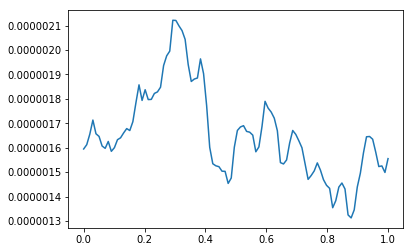

In [43]:
plt.plot(x,main[8000,1:-1])

# question 1

In [12]:
# declare arrays

nx = 100
nm = 4
x = np.zeros(nx)
f = np.zeros(nx+2)
fnew = np.zeros(nx+2)
fmom = np.zeros(nm+1)
hmom = np.zeros(nm+1)
xmom = np.zeros(nm+1)
mvar = []
main = []
tt = []
# baseline parameters
Nsteps = 10000
nout = 100
sizex = 1.0
dx = sizex/float(nx-1)
dif = 0
vel = 0
cha = 20.0
chb = 1.0
# mesh size and CFL numbers
# pe = vel*sizex/dif
# da = cha*sizex*sizex/dif

cfl = 0.4
dtd = 1.0
if dif != 0:
    dtd = dx**2/dif
dta = 1.0
if vel != 0:
    dta = dx/vel
dtc = 1.0
if cha != 0.0:
    dtc = 1.0/cha

dt = cfl*min(min(dta,dtd),dtc)

alfa = vel*dt/dx
delta = dif*dt/(dx*dx)

wid = 10
sigma = wid*dx

for i in range(nx):
    x[i] = dx*float(i)
    xj = (x[i]-sizex/2)/sigma
    f[i+1] = np.exp(-0.5*xj*xj)
main.append(np.copy(f))

a = delta + 0.5*alfa
b = delta - 0.5*alfa
c = 1.0-a-b
# chal = np.zeros(nx)
# for i in range(nx):
#     chal[i]= cha*np.random.randn()

for j in range(0,Nsteps):
    f[0] = f[nx]
    f[nx+1] = f[1]
    for k in range(1,nx+1):
        fnew[k] = a*f[k-1] + c*f[k] + b*f[k+1] +cha*dt*f[k]-chb*dt*f[k]*f[k]
    for k in range(nx):
        f[k+1] = fnew[k+1]
    main.append(np.copy(f))
    if(np.mod(j,nout) ==1 ):
            for k in range(nm+1):
                fmom[k] = 0.0
                hmom[k] = 0.0
                xmom[k] = 0.0
            for k in range(nx):
                fj = f[k+1]
                fmom[0] = fmom[0] + fj*dx
                fmom[1] = fmom[1] + fj*x[k]*dx
                fmom[2] = fmom[2] + fj*x[k]*x[k]*dx

                hmom[2] = hmom[2] - fj*fj*dx
                hmom[3] = hmom[3] - (fj**3)*dx
                hmom[4] = hmom[4] - (fj**4)*dx
                if (x[k] > 0.9*sizex):
                    xmom[1] = xmom[1]+fj*x[k]
                    xmom[2] = xmom[2]+fj*x[k]**2
                    xmom[3] = xmom[3]+fj*x[k]**3
            fmean = fmom[1]/fmom[0]
            fvar = fmom[2]/fmom[0] - fmean*fmean
            mvar.append((fmean,fvar))
            tt.append(dt*j)

main = np.array(main)



In [18]:
import numpy as np
import matplotlib.pyplot as plt
np.mod(101,100)

1

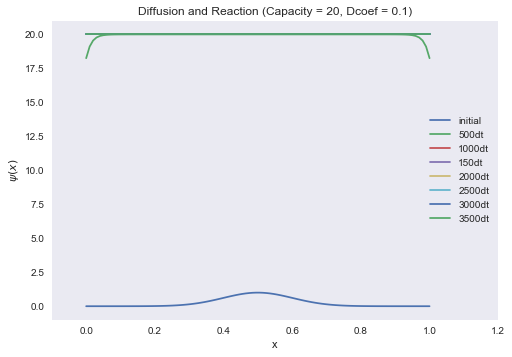

In [19]:
plt.figure()
plt.plot(x,main[0,1:-1],label = 'initial')
plt.plot(x,main[50,1:-1],label = '500dt')
plt.plot(x,main[100,1:-1],label = '1000dt')
plt.plot(x,main[150,1:-1],label = '150dt')
plt.plot(x,main[200,1:-1],label = '2000dt')
plt.plot(x,main[250,1:-1],label = '2500dt')
plt.plot(x,main[300,1:-1],label = '3000dt')
plt.plot(x,main[350,1:-1],label = '3500dt')
# plt.plot(x,main[4000,1:-1],label = '4000dt')
# plt.plot(x,main[9000,1:-1],label = '9000dt')
plt.xlabel('x')
plt.ylabel('$ \psi(x) $')
plt.xlim([-0.1,1.2])
plt.legend( loc="center right")
plt.title('Diffusion and Reaction (Capacity = 20, Dcoef = 0.1)')
plt.grid(False)


In [22]:
plt.plot(tt,mvar)


(10,)

# Question 2: 2D ADR

In [11]:
# declare arrays

nx = 100
ny = 100
nm = 4
x = np.zeros(nx)
y = np.zeros(ny)
f = np.zeros((nx+2,nx+2))
fnew = np.zeros((nx+2,nx+2))

main = []
# baseline parameters
Nsteps = 2000
nout = 100
sizex = 1.0
sizey = 1.0
dx = sizex/float(nx-1)
dy = sizey/float(ny-1)

dif = 0.01
vel = 2
cha = 20.0
chb = 1.0
# mesh size and CFL numbers
# pe = vel*sizex/dif
# da = cha*sizex*sizex/dif

cfl = 0.1
dtd = 1.0
if dif != 0:
    dtd = dx**2/dif
dta = 1.0
if vel != 0:
    dta = dx/vel
dtc = 1.0
if cha != 0.0:
    dtc = 1.0/cha

dt = cfl*min(min(dta,dtd),dtc)

alfa = vel*dt/dx
delta = dif*dt/(dx*dx)

wid = 1
sigma = wid*10*dx

for i in range(nx):
    x[i] = dx*float(i)
    xj = (x[i]-sizex/2)/sigma
    for j in range(ny):
        y[j] = dy*float(j)
        yj = (y[j] - sizey/2)/sigma
        f[i+1,j+1] = (np.exp(-0.5*xj*xj))*(np.exp(-0.5*yj*yj))
#plt.plot(x,f[1:-1])
main.append(np.copy(f))

a = delta - 0.5*alfa
b = delta + 0.5*alfa
c = 1.0-a-b

for j in range(0,Nsteps):
    # BC
    f[0,:] = f[nx,:]
    f[nx+1,:] = f[1,:]
    f[:,0] = f[:,ny]
    f[:,ny+1] = f[:,1]

    for k in range(1,nx+1):
        for l in range(1,nx+1):
            fnew[k,l] = a*f[k-1,l] + c*f[k,l] + b*f[k+1,l] + a*f[k,l-1] + b*f[k,l+1] -2*delta*f[k,l] +cha*dt*f[k,l]-chb*dt*f[k,l]*f[k,l]
    main.append(np.copy(f))
    for k in range(nx):
        for l in range(nx):
            f[k+1,l+1] = fnew[k+1,l+1]
    
main = np.array(main)



In [12]:
main = np.array(main)

In [13]:
X,Y = np.meshgrid(x,y)

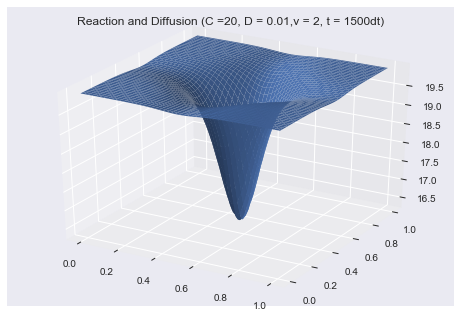

In [16]:
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, main[1500,1:-1,1:-1])
plt.title('Reaction and Diffusion (C =20, D = 0.01,v = 2, t = 1500dt)')
plt.savefig('adr3.jpg')

# Question 3

In [11]:
x =1
dt = 0.1
time = 0
eapp = []
f =[]
tt = []
xapp = []
vals = 0
while time < 1:
    error = abs(x+dt*x**2 - x)
    eapp.append(error)
    xapp.append(x)
    while error > 10**(-3):
        dt = dt/2
        error = abs(x+dt*x**2-x)
    x = x+dt*x**2
    vals += dt
    tt.append(vals)
    f.append(x+dt*x**2)
    time = time + dt
    dt = 0.1

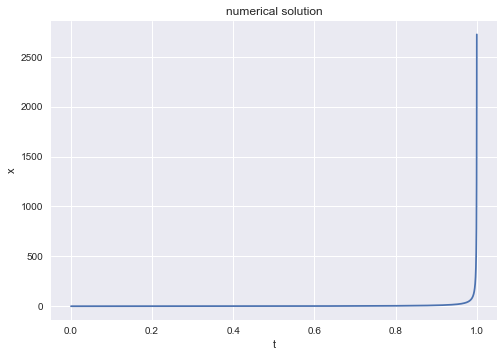

In [17]:
#plt.plot(xapp,eapp)
plt.figure()
plt.plot(tt,xapp)
plt.xlabel('t')
plt.ylabel('x')
plt.title('numerical solution')
plt.savefig('numsol.jpg')

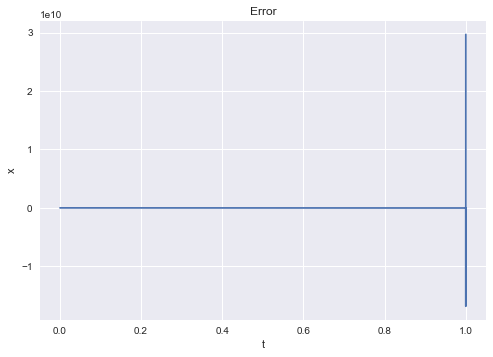

In [19]:
tt = np.array(tt)
plt.plot(tt,xapp -(1/(1-tt)))
plt.xlabel('t')
plt.ylabel('x')
plt.title('Error')
plt.savefig('numerror.jpg')

In [8]:
tt

[0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,
 0.00078125,

In [3]:
x

2722.938358615613

# Question 4

In [2]:
# declare arrays

nuni = 0
ifd = 2

nx = 100
nm = 4
x = np.zeros(nx)
u = np.zeros(nx+2)
f = np.zeros(nx+2)
fnew = np.zeros(nx+2)

fmom = np.zeros(nm+1)
hmom = np.zeros(nm+1)
xmom = np.zeros(nm+1)
mvar = []
tt = []
main = []
# baseline parameters
Nsteps = 500
nout = 25
sizex = 1.0
dx = sizex/float(nx-1)
dif = 0
vel = 0.1


cfl = 0.05
dtd = 1.0
if dif != 0:
    dtd = 0.5*dx**2/dif
dta = 1.0
if vel != 0:
    dta = dx/vel

dt = cfl*min(dta,dtd)

dnum = dx*dx/dt
delta = dif/dnum

# Initial conditions
wid = 8.0
sigma = wid*dx
xm = 0.5*(sizex - sigma)
xp = 0.5*(sizex + sigma)

for i in range(nx):
    x[i] = dx*float(i)
    f[i+1] = 0
    if (x[i]>xm) and (x[i]<xp):
        f[i+1] = 1.0
    xj = (x[i]-sizex/2)/(sizex/2)
    u[i+1] = vel
    if (nuni > 0 ):
        u[i+1] = vel*(1-xj*xj)
# for i in range(nx):
#     x[i] = dx*float(i)
#     xj = (x[i]-sizex/2)/sigma
#     f[i+1] = np.exp(-0.5*xj*xj)
#     u[i+1] = vel
    
main.append(np.copy(f))

u[0] = u[nx]
u[nx+1] = u[1]

for j in range(0,Nsteps):
    time = dt*j
    f[0] = f[nx]
    f[nx+1] = f[1]
    for k in range(1,nx+1):
        alfal = u[k-1]*dt/dx
        alfac = u[k]*dt/dx
        alfar = u[k+1]*dt/dx
        if (ifd == 2):
            if (u[k]>0):
                a = alfal + delta
                b = delta
                c = 1. - alfac - 2.*delta
            else:
                a = delta
                b = delta - alfar
                c = 1. + alfac -2*delta
        fnew[k] = a*f[k-1] + c*f[k] + b*f[k+1] 
    for k in range(nx):
        f[k+1] = fnew[k+1]
    if(np.mod(j,nout) ==1 ):
            for k in range(nm+1):
                fmom[k] = 0.0
                hmom[k] = 0.0
                xmom[k] = 0.0
            for k in range(nx):
                fj = f[k+1]
                fmom[0] = fmom[0] + fj*dx
                fmom[1] = fmom[1] + fj*x[k]*dx
                fmom[2] = fmom[2] + fj*x[k]*x[k]*dx

                hmom[2] = hmom[2] - fj*fj*dx
                hmom[3] = hmom[3] - (fj**3)*dx
                hmom[4] = hmom[4] - (fj**4)*dx
                if (x[k] > 0.9*sizex):
                    xmom[1] = xmom[1]+fj*x[k]
                    xmom[2] = xmom[2]+fj*x[k]**2
                    xmom[3] = xmom[3]+fj*x[k]**3
            fmean = fmom[1]/fmom[0]
            fvar = fmom[2]/fmom[0] - fmean*fmean
            mvar.append((fmean,fvar))
            tt.append(dt*j)

    main.append(np.copy(f))
    
main = np.array(main)



C:\Users\Shaan Desai\Anaconda3\lib\site-packages\ipykernel\__main__.py:105: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Shaan Desai\Anaconda3\lib\site-packages\ipykernel\__main__.py:106: RuntimeWarning: invalid value encountered in double_scalars


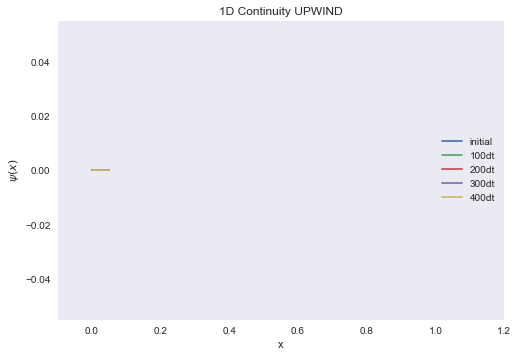

In [3]:
plt.figure()
plt.plot(x,main[0,1:-1],label = 'initial')
plt.plot(x,main[100,1:-1],label = '100dt')
plt.plot(x,main[200,1:-1],label = '200dt')
plt.plot(x,main[300,1:-1],label = '300dt')
plt.plot(x,main[400,1:-1],label = '400dt')
plt.xlabel('x')
plt.ylabel('$ \psi(x) $')
plt.xlim([-0.1,1.2])
plt.legend( loc="center right")
plt.title('1D Continuity UPWIND')
plt.grid(False)
plt.savefig('1dcts.jpg')

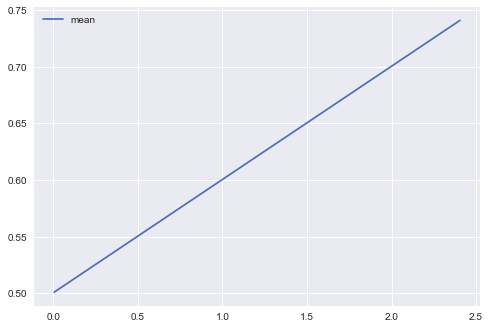

In [17]:
mvar = np.array(mvar)
tt = np.array(tt)
plt.figure()
plt.plot(tt,mvar[:,0],label = 'mean')
#plt.plot(tt,mvar[:,1],label = 'var')
plt.legend()
plt.savefig('m1.jpg')

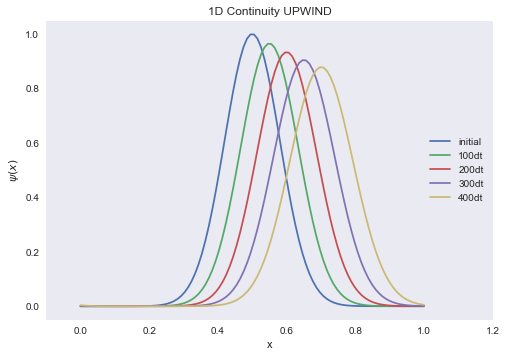

In [23]:
# declare arrays

nuni = 0
ifd = 2

nx = 100
nm = 4
x = np.zeros(nx)
u = np.zeros(nx+2)
f = np.zeros(nx+2)
fnew = np.zeros(nx+2)

fmom = np.zeros(nm+1)
hmom = np.zeros(nm+1)
xmom = np.zeros(nm+1)
mvar = []
tt = []


mvar = []
tt = []

main = []
# baseline parameters
Nsteps = 500
nout = 25
sizex = 1.0
dx = sizex/float(nx-1)
dif = 0
vel = 0.1

cfl = 0.05
dtd = 1.0
if dif != 0:
    dtd = 0.5*dx**2/dif
dta = 1.0
if vel != 0:
    dta = dx/vel

dt = cfl*min(dta,dtd)
dnum = dx*dx/dt
delta = dif/dnum

# Initial conditions
wid = 8.0
sigma = wid*dx
xm = 0.5*(sizex - sigma)
xp = 0.5*(sizex + sigma)

# for i in range(nx):
#     x[i] = dx*float(i)
#     f[i+1] = 0
#     if (x[i]>xm) and (x[i]<xp):
#         f[i+1] = 1.0
#     xj = (x[i]-sizex/2)/(sizex/2)
#     u[i+1] = vel
#     if (nuni > 0 ):
#         u[i+1] = vel*(1-xj*xj)
for i in range(nx):
    x[i] = dx*float(i)
    xj = (x[i]-sizex/2)/sigma
    f[i+1] = np.exp(-0.5*xj*xj)
    u[i+1] = vel
    
main.append(np.copy(f))

u[0] = u[nx]
u[nx+1] = u[1]

for j in range(0,Nsteps):
    time = dt*j
    f[0] = f[nx]
    f[nx+1] = f[1]
    for k in range(1,nx+1):
        alfal = u[k-1]*dt/dx
        alfac = u[k]*dt/dx
        alfar = u[k+1]*dt/dx
        if (ifd == 2):
            if (u[k]>0):
                a = alfal + delta
                b = delta
                c = 1. - alfac - 2.*delta
            else:
                a = delta
                b = delta - alfar
                c = 1. + alfac -2*delta
        fnew[k] = a*f[k-1] + c*f[k] + b*f[k+1] 
    for k in range(nx):
        f[k+1] = fnew[k+1]
    if(np.mod(j,nout) ==1 ):
            for k in range(nm+1):
                fmom[k] = 0.0
                hmom[k] = 0.0
                xmom[k] = 0.0
            for k in range(nx):
                fj = f[k+1]
                fmom[0] = fmom[0] + fj*dx
                fmom[1] = fmom[1] + fj*x[k]*dx
                fmom[2] = fmom[2] + fj*x[k]*x[k]*dx

                hmom[2] = hmom[2] - fj*fj*dx
                hmom[3] = hmom[3] - (fj**3)*dx
                hmom[4] = hmom[4] - (fj**4)*dx
                if (x[k] > 0.9*sizex):
                    xmom[1] = xmom[1]+fj*x[k]
                    xmom[2] = xmom[2]+fj*x[k]**2
                    xmom[3] = xmom[3]+fj*x[k]**3
            fmean = fmom[1]/fmom[0]
            fvar = fmom[2]/fmom[0] - fmean*fmean
            mvar.append((fmean,fvar))
            tt.append(dt*j)

    main.append(np.copy(f))
    
main = np.array(main)

plt.figure()
plt.plot(x,main[0,1:-1],label = 'initial')
plt.plot(x,main[100,1:-1],label = '100dt')
plt.plot(x,main[200,1:-1],label = '200dt')
plt.plot(x,main[300,1:-1],label = '300dt')
plt.plot(x,main[400,1:-1],label = '400dt')
plt.xlabel('x')
plt.ylabel('$ \psi(x) $')
plt.xlim([-0.1,1.2])
plt.legend( loc="center right")
plt.title('1D Continuity UPWIND')
plt.grid(False)
plt.savefig('gupwind.jpg')


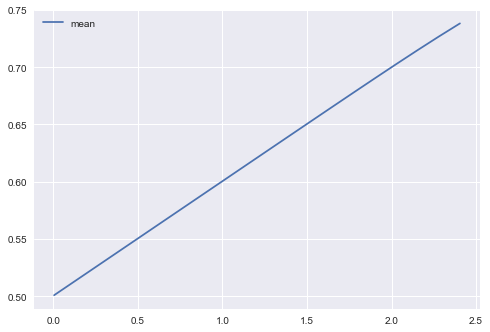

In [20]:
mvar = np.array(mvar)
tt = np.array(tt)
plt.figure()
plt.plot(tt,mvar[:,0],label = 'mean')
#plt.plot(tt,mvar[:,1],label = 'var')
plt.legend()
plt.savefig('m2.jpg')

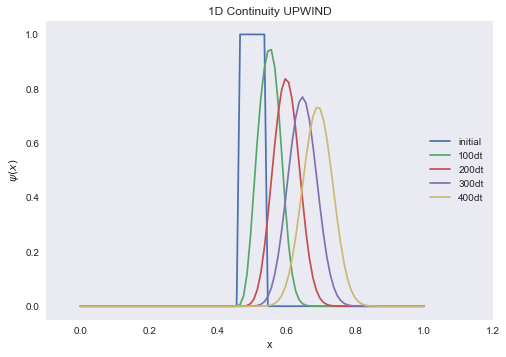

In [21]:
# declare arrays

nuni = 1
ifd = 2

nx = 100
nm = 4
x = np.zeros(nx)
u = np.zeros(nx+2)
f = np.zeros(nx+2)
fnew = np.zeros(nx+2)

main = []
# baseline parameters
Nsteps = 500
nout = 25
sizex = 1.0
dx = sizex/float(nx-1)
dif = 0
vel = 0.1

cfl = 0.05
dtd = 1.0
if dif != 0:
    dtd = 0.5*dx**2/dif
dta = 1.0
if vel != 0:
    dta = dx/vel

dt = cfl*min(dta,dtd)
dnum = dx*dx/dt
delta = dif/dnum

# Initial conditions
wid = 8.0
sigma = wid*dx
xm = 0.5*(sizex - sigma)
xp = 0.5*(sizex + sigma)

for i in range(nx):
    x[i] = dx*float(i)
    f[i+1] = 0
    if (x[i]>xm) and (x[i]<xp):
        f[i+1] = 1.0
    xj = (x[i]-sizex/2)/(sizex/2)
    u[i+1] = vel
    if (nuni > 0 ):
        u[i+1] = vel*(1-xj*xj)
    
main.append(np.copy(f))

u[0] = u[nx]
u[nx+1] = u[1]

for j in range(0,Nsteps):
    time = dt*j
    f[0] = f[nx]
    f[nx+1] = f[1]
    for k in range(1,nx+1):
        alfal = u[k-1]*dt/dx
        alfac = u[k]*dt/dx
        alfar = u[k+1]*dt/dx
        if (ifd == 2):
            if (u[k]>0):
                a = alfal + delta
                b = delta
                c = 1. - alfac - 2.*delta
            else:
                a = delta
                b = delta - alfar
                c = 1. + alfac -2*delta
        fnew[k] = a*f[k-1] + c*f[k] + b*f[k+1] 
    for k in range(nx):
        f[k+1] = fnew[k+1]
    main.append(np.copy(f))
    
main = np.array(main)

plt.figure()
plt.plot(x,main[0,1:-1],label = 'initial')
plt.plot(x,main[100,1:-1],label = '100dt')
plt.plot(x,main[200,1:-1],label = '200dt')
plt.plot(x,main[300,1:-1],label = '300dt')
plt.plot(x,main[400,1:-1],label = '400dt')
plt.xlabel('x')
plt.ylabel('$ \psi(x) $')
plt.xlim([-0.1,1.2])
plt.legend( loc="center right")
plt.title('1D Continuity UPWIND')
plt.grid(False)



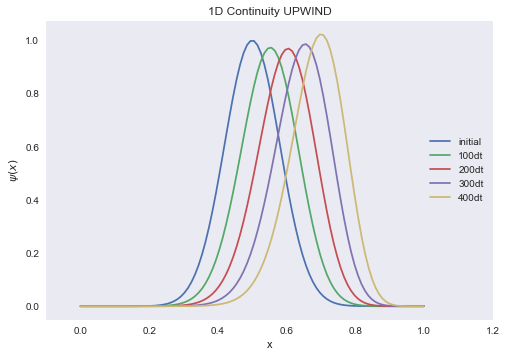

In [24]:
# declare arrays

nuni = 1
ifd = 2

nx = 100
nm = 4
x = np.zeros(nx)
u = np.zeros(nx+2)
f = np.zeros(nx+2)
fnew = np.zeros(nx+2)

main = []
# baseline parameters
Nsteps = 500
nout = 25
sizex = 1.0
dx = sizex/float(nx-1)
dif = 0
vel = 0.1

cfl = 0.05
dtd = 1.0
if dif != 0:
    dtd = 0.5*dx**2/dif
dta = 1.0
if vel != 0:
    dta = dx/vel

dt = cfl*min(dta,dtd)
dnum = dx*dx/dt
delta = dif/dnum

# Initial conditions
wid = 8.0
sigma = wid*dx
xm = 0.5*(sizex - sigma)
xp = 0.5*(sizex + sigma)

for i in range(nx):
    x[i] = dx*float(i)
    xj = (x[i]-sizex/2)/sigma
    f[i+1] = np.exp(-0.5*xj*xj)
    xj = (x[i]-sizex/2)/(sizex/2)
    u[i+1] = vel
    if (nuni > 0 ):
        u[i+1] = vel*(1-xj*xj)
    
main.append(np.copy(f))

u[0] = u[nx]
u[nx+1] = u[1]

for j in range(0,Nsteps):
    time = dt*j
    f[0] = f[nx]
    f[nx+1] = f[1]
    for k in range(1,nx+1):
        alfal = u[k-1]*dt/dx
        alfac = u[k]*dt/dx
        alfar = u[k+1]*dt/dx
        if (ifd == 2):
            if (u[k]>0):
                a = alfal + delta
                b = delta
                c = 1. - alfac - 2.*delta
            else:
                a = delta
                b = delta - alfar
                c = 1. + alfac -2*delta
        fnew[k] = a*f[k-1] + c*f[k] + b*f[k+1] 
    for k in range(nx):
        f[k+1] = fnew[k+1]
    main.append(np.copy(f))
    
main = np.array(main)

plt.figure()
plt.plot(x,main[0,1:-1],label = 'initial')
plt.plot(x,main[100,1:-1],label = '100dt')
plt.plot(x,main[200,1:-1],label = '200dt')
plt.plot(x,main[300,1:-1],label = '300dt')
plt.plot(x,main[400,1:-1],label = '400dt')
plt.xlabel('x')
plt.ylabel('$ \psi(x) $')
plt.xlim([-0.1,1.2])
plt.legend( loc="center right")
plt.title('1D Continuity UPWIND')
plt.grid(False)
plt.savefig('gparabolic.jpg')


# Lax Wendroff

In [6]:
# declare arrays

nuni = 0
ifd = 2

nx = 100
nm = 4
x = np.zeros(nx)
u = np.zeros(nx+2)
f = np.zeros(nx+2)
fnew = np.zeros(nx+2)

fmom = np.zeros(nm+1)
hmom = np.zeros(nm+1)
xmom = np.zeros(nm+1)
mvar = []
tt = []


main = []
# baseline parameters
Nsteps = 500
nout = 25
sizex = 1.0
dx = sizex/float(nx-1)
dif = 0
vel = 0.1

cfl = 0.05
dtd = 1.0
if dif != 0:
    dtd = 0.5*dx**2/dif
dta = 1.0
if vel != 0:
    dta = dx/vel

dt = cfl*min(dta,dtd)
dnum = dx*dx/dt
delta = dif/dnum

# Initial conditions
wid = 8.0
sigma = wid*dx
xm = 0.5*(sizex - sigma)
xp = 0.5*(sizex + sigma)

for i in range(nx):
    x[i] = dx*float(i)
    f[i+1] = 0
    if (x[i]>xm) and (x[i]<xp):
        f[i+1] = 1.0
    xj = (x[i]-sizex/2)/(sizex/2)
    u[i+1] = vel
    if (nuni > 0 ):
        u[i+1] = vel*(1-xj*xj)
# for i in range(nx):
#     x[i] = dx*float(i)
#     xj = (x[i]-sizex/2)/sigma
#     f[i+1] = np.exp(-0.5*xj*xj)
#     u[i+1] = vel
    
main.append(np.copy(f))

u[0] = u[nx]
u[nx+1] = u[1]

for j in range(0,Nsteps):
    time = dt*j
    f[0] = f[nx]
    f[nx+1] = f[1]
    for k in range(1,nx+1):
        alfal = u[k-1]*dt/dx
        alfac = u[k]*dt/dx
        alfar = u[k+1]*dt/dx
        if (ifd == 2):
            if (u[k]>0):
                a = alfal/2 *(1+alfal) + delta
                b = delta + alfal/2*(-1+alfal)
                c = 1. - alfac**2 - 2.*delta
            else:
                a = delta
                b = delta - alfar
                c = 1. + alfac -2*delta
        fnew[k] = a*f[k-1] + c*f[k] + b*f[k+1] 
    for k in range(nx):
        f[k+1] = fnew[k+1]
    if(np.mod(j,nout) ==1 ):
            for k in range(nm+1):
                fmom[k] = 0.0
                hmom[k] = 0.0
                xmom[k] = 0.0
            for k in range(nx):
                fj = f[k+1]
                fmom[0] = fmom[0] + fj*dx
                fmom[1] = fmom[1] + fj*x[k]*dx
                fmom[2] = fmom[2] + fj*x[k]*x[k]*dx

                hmom[2] = hmom[2] - fj*fj*dx
                hmom[3] = hmom[3] - (fj**3)*dx
                hmom[4] = hmom[4] - (fj**4)*dx
                if (x[k] > 0.9*sizex):
                    xmom[1] = xmom[1]+fj*x[k]
                    xmom[2] = xmom[2]+fj*x[k]**2
                    xmom[3] = xmom[3]+fj*x[k]**3
            fmean = fmom[1]/fmom[0]
            fvar = fmom[2]/fmom[0] - fmean*fmean
            mvar.append((fmean,fvar))
            tt.append(dt*j)

    main.append(np.copy(f))
    
main = np.array(main)



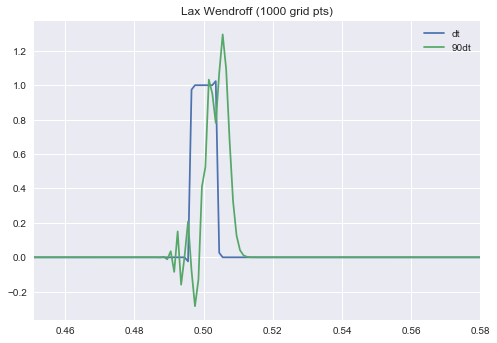

In [44]:
plt.figure()
plt.plot(x,main[1,1:-1],label = 'dt')
plt.plot(x,main[90,1:-1],label = '90dt')
plt.title('Lax Wendroff (1000 grid pts)')
plt.legend()
plt.xlim([0.451,0.58])
plt.savefig('lw2.jpg')

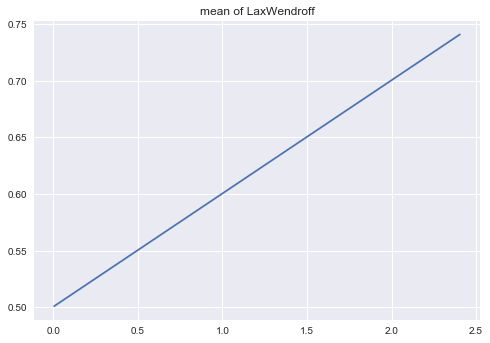

In [33]:
mvar= np.array(mvar)
tt = np.array(tt)
plt.plot(tt,mvar[:,0])
plt.title('mean of LaxWendroff')
plt.savefig('lwendmean.jpg')

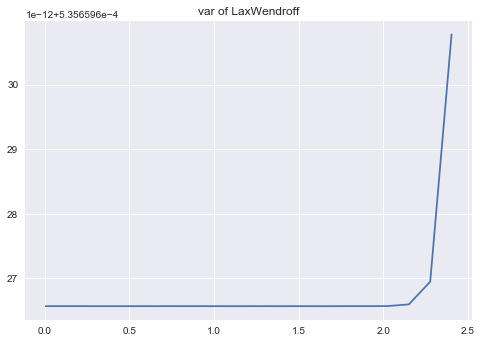

In [34]:
mvar= np.array(mvar)
tt = np.array(tt)
plt.plot(tt,mvar[:,1])
plt.title('var of LaxWendroff')
plt.savefig('lwendvar.jpg')

# Lax Friedrichs

In [2]:
# declare arrays

nuni = 0
ifd = 2

nx = 100
nm = 4
x = np.zeros(nx)
u = np.zeros(nx+2)
f = np.zeros(nx+2)
fnew = np.zeros(nx+2)

fmom = np.zeros(nm+1)
hmom = np.zeros(nm+1)
xmom = np.zeros(nm+1)
mvar = []
tt = []


main = []
# baseline parameters
Nsteps = 500
nout = 25
sizex = 1.0
dx = sizex/float(nx-1)
dif = 0
vel = 0.1

cfl = 0.05
dtd = 1.0
if dif != 0:
    dtd = 0.5*dx**2/dif
dta = 1.0
if vel != 0:
    dta = dx/vel

dt = cfl*min(dta,dtd)
dnum = dx*dx/dt
delta = dif/dnum

# Initial conditions
wid = 8.0
sigma = wid*dx
xm = 0.5*(sizex - sigma)
xp = 0.5*(sizex + sigma)

for i in range(nx):
    x[i] = dx*float(i)
    f[i+1] = 0
    if (x[i]>xm) and (x[i]<xp):
        f[i+1] = 1.0
    xj = (x[i]-sizex/2)/(sizex/2)
    u[i+1] = vel
    if (nuni > 0 ):
        u[i+1] = vel*(1-xj*xj)
# for i in range(nx):
#     x[i] = dx*float(i)
#     xj = (x[i]-sizex/2)/sigma
#     f[i+1] = np.exp(-0.5*xj*xj)
#     u[i+1] = vel
    
main.append(np.copy(f))
epsilon = 0.02
u[0] = u[nx]
u[nx+1] = u[1]

for j in range(0,Nsteps):
    time = dt*j
    f[0] = f[nx]
    f[nx+1] = f[1]
    for k in range(1,nx+1):
        alfal = u[k-1]*dt/dx
        alfac = u[k]*dt/dx
        alfar = u[k+1]*dt/dx
        if (ifd == 2):
            fnew[k] = f[k] + epsilon/2 *(f[k-1] - 2*f[k] + f[k+1]) - (dt/(2*dx))*(u[k+1]*f[k+1]-u[k-1]*f[k-1]) 
    for k in range(nx):
        f[k+1] = fnew[k+1]
    if(np.mod(j,nout) ==1 ):
            for k in range(nm+1):
                fmom[k] = 0.0
                hmom[k] = 0.0
                xmom[k] = 0.0
            for k in range(nx):
                fj = f[k+1]
                fmom[0] = fmom[0] + fj*dx
                fmom[1] = fmom[1] + fj*x[k]*dx
                fmom[2] = fmom[2] + fj*x[k]*x[k]*dx

                hmom[2] = hmom[2] - fj*fj*dx
                hmom[3] = hmom[3] - (fj**3)*dx
                hmom[4] = hmom[4] - (fj**4)*dx
                if (x[k] > 0.9*sizex):
                    xmom[1] = xmom[1]+fj*x[k]
                    xmom[2] = xmom[2]+fj*x[k]**2
                    xmom[3] = xmom[3]+fj*x[k]**3
            fmean = fmom[1]/fmom[0]
            fvar = fmom[2]/fmom[0] - fmean*fmean
            mvar.append((fmean,fvar))
            tt.append(dt*j)

    main.append(np.copy(f))
    
main = np.array(main)



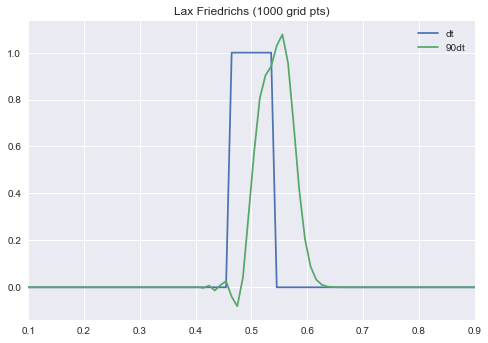

In [3]:
plt.figure()
plt.plot(x,main[0,1:-1],label = 'dt')
plt.plot(x,main[90,1:-1],label = '90dt')
plt.title('Lax Friedrichs (1000 grid pts)')
plt.xlim([0.1,0.9])
plt.legend()
plt.savefig('lf1.jpg')

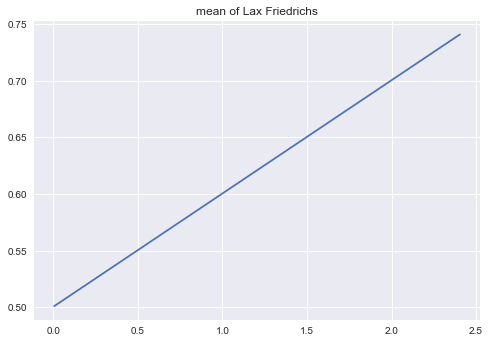

In [4]:
mvar= np.array(mvar)
tt = np.array(tt)
plt.plot(tt,mvar[:,0])
plt.title('mean of Lax Friedrichs')
plt.savefig('lfmean.jpg')

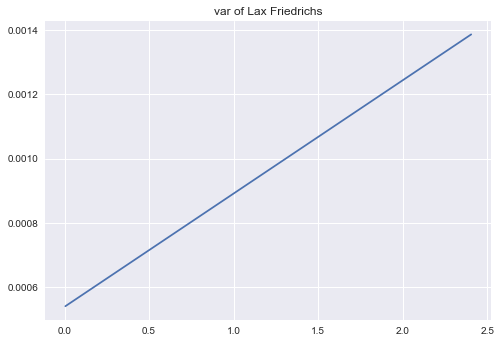

In [5]:
mvar= np.array(mvar)
tt = np.array(tt)
plt.plot(tt,mvar[:,1])
plt.title('var of Lax Friedrichs')
plt.savefig('lfvar.jpg')

# Interpolation

In [3]:
# declare arrays

nuni = 0
ifd = 2
nx = 100
nm = 4
x = np.zeros(nx)
u = np.zeros(nx+2)
f = np.zeros(nx+2)
fnew = np.zeros(nx+2)
fmom = np.zeros(nm+1)
hmom = np.zeros(nm+1)
xmom = np.zeros(nm+1)
mvar = []
tt = []
main = []

# baseline parameters
Nsteps = 500
nout = 25
sizex = 1.0
dx = sizex/float(nx-1)
dif = 0

# Constant velocity
vel = 0.1
cfl = 0.05


dtd = 1.0
if dif != 0:
    dtd = 0.5*dx**2/dif
dta = 1.0
if vel != 0:
    dta = dx/vel

dt = cfl*min(dta,dtd)
dnum = dx*dx/dt
delta = dif/dnum

# Initial conditions
wid = 8.0
sigma = wid*dx
xm = 0.5*(sizex - sigma)
xp = 0.5*(sizex + sigma)

for i in range(nx):
    x[i] = dx*float(i)
    f[i+1] = 0
    if (x[i]>xm) and (x[i]<xp):
        f[i+1] = 1.0
    xj = (x[i]-sizex/2)/(sizex/2)
    u[i+1] = vel
    if (nuni > 0 ):
        u[i+1] = vel*(1-xj*xj)
    
main.append(np.copy(f))

u[0] = u[nx]
u[nx+1] = u[1]

for j in range(0,Nsteps):
    f[0] = f[nx]
    f[nx+1] = f[1]
    for k in range(1,nx+1):
        alfa = dt/dx
        A = (0.5+u[k]*alfa)/(1-(alfa*u[k-1] - alfa*u[k]))
        B = (0.5 - u[k]*alfa)/(1 + (alfa*u[k+1] - alfa*u[k]))
        if (ifd == 2):
            fnew[k] = 0.5*A**2*(f[k-1] - f[k]) + 0.5*B**2*(f[k+1] - f[k]) + (A+B)*f[k] 
        
    for k in range(nx):
        f[k+1] = fnew[k+1]
    if(np.mod(j,nout) ==1 ):
            for k in range(nm+1):
                fmom[k] = 0.0
                hmom[k] = 0.0
                xmom[k] = 0.0
            for k in range(nx):
                fj = f[k+1]
                fmom[0] = fmom[0] + fj*dx
                fmom[1] = fmom[1] + fj*x[k]*dx
                fmom[2] = fmom[2] + fj*x[k]*x[k]*dx

                hmom[2] = hmom[2] - fj*fj*dx
                hmom[3] = hmom[3] - (fj**3)*dx
                hmom[4] = hmom[4] - (fj**4)*dx
                if (x[k] > 0.9*sizex):
                    xmom[1] = xmom[1]+fj*x[k]
                    xmom[2] = xmom[2]+fj*x[k]**2
                    xmom[3] = xmom[3]+fj*x[k]**3
            fmean = fmom[1]/fmom[0]
            fvar = fmom[2]/fmom[0] - fmean*fmean
            mvar.append((fmean,fvar))
            tt.append(dt*j)

    main.append(np.copy(f))
    
main = np.array(main)



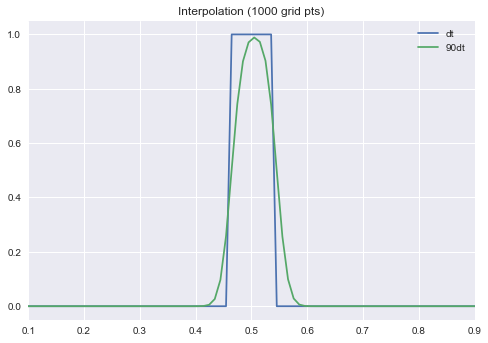

In [6]:
plt.figure()
plt.plot(x,main[0,1:-1],label = 'dt')
plt.plot(x,main[10,1:-1],label = '90dt')
plt.title('Interpolation (1000 grid pts)')
plt.xlim([0.1,0.9])
plt.legend()
plt.savefig('lf1.jpg')

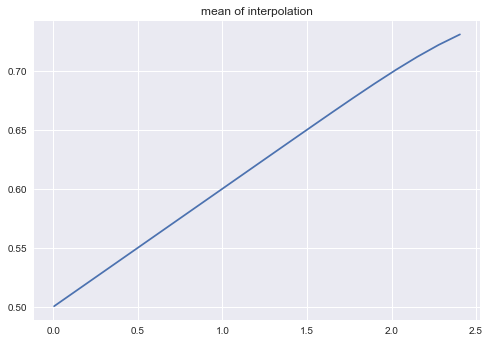

In [8]:
mvar= np.array(mvar)
tt = np.array(tt)
plt.plot(tt,mvar[:,0])
plt.title('mean of interpolation')
plt.savefig('lfmean.jpg')

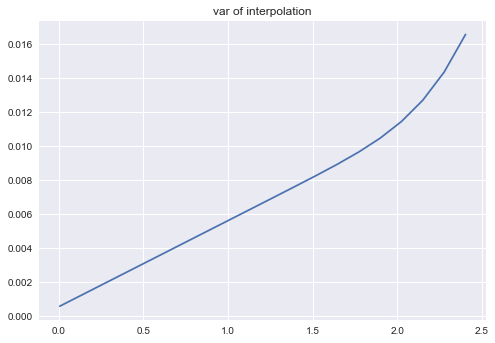

In [9]:
mvar= np.array(mvar)
tt = np.array(tt)
plt.plot(tt,mvar[:,1])
plt.title('var of interpolation')
plt.savefig('lfmean.jpg')

# Combo Schema

In [2]:
# declare arrays

nuni = 0

methods = []
diags = []
for ifd in range(5):
    print(ifd)
    nx = 100
    nm = 4
    x = np.zeros(nx)
    u = np.zeros(nx+2)
    f = np.zeros(nx+2)
    fnew = np.zeros(nx+2)
    adif   =-0.125
    fmom = np.zeros(nm+1)
    hmom = np.zeros(nm+1)
    xmom = np.zeros(nm+1)
    mvar = []
    tt = []
    main = []
    mass = []
    # baseline parameters
    Nsteps = 500
    nout = 25
    sizex = 1.0
    dx = sizex/float(nx-1)
    dif = 0
    vel = 0.1
    cfl = 0.05
    dtd = 1.0
    if dif != 0:
        dtd = 0.5*dx**2/dif
    dta = 1.0
    if vel != 0:
        dta = dx/vel

    dt = cfl*min(dta,dtd)
    dnum = dx*dx/dt
    delta = dif/dnum

    # Initial conditions
    wid = 8.0
    sigma = wid*dx
    xm = 0.5*(sizex - sigma)
    xp = 0.5*(sizex + sigma)

    for i in range(nx):
        x[i] = dx*float(i)
        f[i+1] = 0
        if (x[i]>xm) and (x[i]<xp):
            f[i+1] = 1.0
        xj = (x[i]-sizex/2)/(sizex/2)
        u[i+1] = vel
        if (nuni > 0 ):
            u[i+1] = vel*(1-xj*xj)
    # for i in range(nx):
    #     x[i] = dx*float(i)
    #     xj = (x[i]-sizex/2)/sigma
    #     f[i+1] = np.exp(-0.5*xj*xj)
    #     u[i+1] = vel
    epsilon = 0.02
    main.append(np.copy(f))

    u[0] = u[nx]
    u[nx+1] = u[1]

    for j in range(0,Nsteps):
        time = dt*j
        f[0] = f[nx]
        f[nx+1] = f[1]
        for k in range(1,nx+1):
            alfal = u[k-1]*dt/dx
            alfac = u[k]*dt/dx
            alfar = u[k+1]*dt/dx
            
        
             
            # Sauro solution w anti diffusion
            if(ifd == 4):
                ql = (0.5+alfac)/(1.0-(alfal-alfac))
                qr = (0.5-alfac)/(1.0+(alfar-alfac))
                a = 0.5*ql*ql
                b = 0.5*qr*qr
                c = ql+qr-a-b
                fnew[k] = a*f[k-1]+c*f[k]+b*f[k+1]
                fluxr = adif*(f[k+1]-f[k])
                fluxl = adif*(f[k-1]-f[k])
                fnew[k] = fnew[k] + fluxr + fluxl
                  

            # interpolation with constant vel
            if(ifd == 3):
                alfa = dt/dx
                A = (0.5+u[k]*alfa)/(1-(alfa*u[k-1] - alfa*u[k]))
                B = (0.5 - u[k]*alfa)/(1 + (alfa*u[k+1] - alfa*u[k]))
                fnew[k] = 0.5*A**2*(f[k-1] - f[k]) + 0.5*B**2*(f[k+1] - f[k]) + (A+B)*f[k] 
                     
            
            # Lax Wendroff
            if (ifd == 2):
                if (u[k]>0):
                    a = alfal/2 *(1+alfal) + delta
                    b = delta + alfal/2*(-1+alfal)
                    c = 1. - alfac**2 - 2.*delta
                else:
                    a = delta
                    b = delta - alfar
                    c = 1. + alfac -2*delta
                fnew[k] = a*f[k-1] + c*f[k] + b*f[k+1]
            
            # Lax Friedrichs
            if (ifd == 1):
                fnew[k] = f[k] + epsilon/2 *(f[k-1] - 2*f[k] + f[k+1]) - (dt/(2*dx))*(u[k+1]*f[k+1]-u[k-1]*f[k-1]) 

            # upwind scheme
            if (ifd == 0):
                if (u[k]>0):
                    a = alfal + delta
                    b = delta
                    c = 1. - alfac - 2.*delta
                else:
                    a = delta
                    b = delta - alfar
                    c = 1. + alfac -2*delta
                fnew[k] = a*f[k-1] + c*f[k] + b*f[k+1] 
        
        for k in range(nx):
            f[k+1] = fnew[k+1]
        if(np.mod(j,nout) ==1 ):
                for k in range(nm+1):
                    fmom[k] = 0.0
                    hmom[k] = 0.0
                    xmom[k] = 0.0
                for k in range(nx):
                    fj = f[k+1]
                    fmom[0] = fmom[0] + fj*dx
                    fmom[1] = fmom[1] + fj*x[k]*dx
                    fmom[2] = fmom[2] + fj*x[k]*x[k]*dx

                    hmom[2] = hmom[2] - fj*fj*dx
                    hmom[3] = hmom[3] - (fj**3)*dx
                    hmom[4] = hmom[4] - (fj**4)*dx
                    if (x[k] > 0.9*sizex):
                        xmom[1] = xmom[1]+fj*x[k]
                        xmom[2] = xmom[2]+fj*x[k]**2
                        xmom[3] = xmom[3]+fj*x[k]**3
                mass = fmom[0]
                fmean = fmom[1]/fmom[0]
                fvar = fmom[2]/fmom[0] - fmean*fmean
                mvar.append((mass,fmean,fvar))
                tt.append(dt*j)

        main.append(np.copy(f))
        
    main = np.array(main)
    methods.append(main)
    mvar = np.array(mvar)
    diags.append(mvar)

0
1
2
3
4


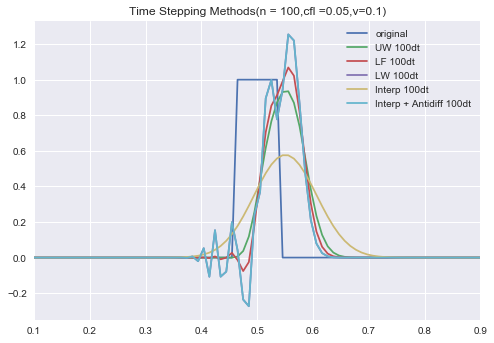

In [3]:
plt.figure()
plt.plot(x,methods[0][0,1:-1],label = 'original')
plt.plot(x,methods[0][100,1:-1],label = 'UW 100dt')
plt.plot(x,methods[1][100,1:-1],label = 'LF 100dt')
plt.plot(x,methods[2][100,1:-1],label = 'LW 100dt')
plt.plot(x,methods[3][100,1:-1],label = 'Interp 100dt')
plt.plot(x,methods[4][100,1:-1],label = 'Interp + Antidiff 100dt')
plt.title('Time Stepping Methods(n = 100,cfl =0.05,v=0.1)')
plt.xlim([0.1,0.9])
plt.legend()
plt.savefig('interdif.jpg')

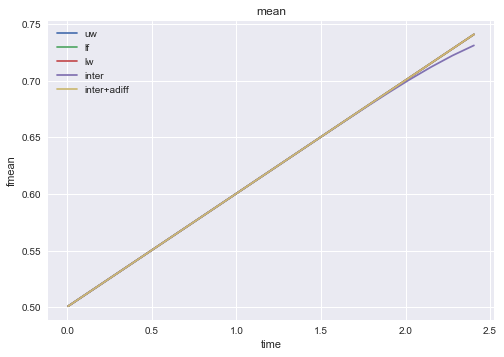

In [50]:
plt.figure()
plt.plot(tt,diags[0][:,1],label = 'uw')
plt.plot(tt,diags[1][:,1],label = 'lf')
plt.plot(tt,diags[2][:,1],label = 'lw')
plt.plot(tt,diags[3][:,1],label = 'inter')
plt.plot(tt,diags[4][:,1],label = 'inter+adiff')
#plt.ylim([min(diags[1][:,1]),max(diags[1][:,2])])
plt.legend()
plt.xlabel('time')
plt.ylabel('fmean')
plt.title('mean')
plt.savefig('meantest1.jpg')

In [9]:
np.shape(diags[0][:,0])

(20,)

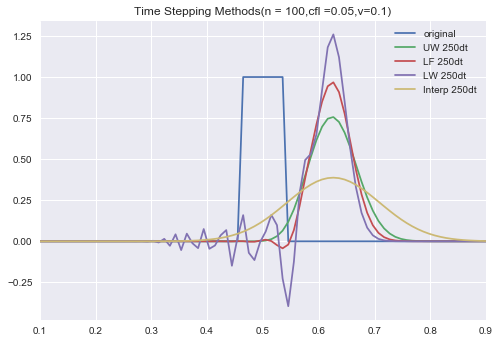

In [5]:
plt.figure()
plt.plot(x,methods[0][0,1:-1],label = 'original')
plt.plot(x,methods[0][250,1:-1],label = 'UW 250dt')
plt.plot(x,methods[1][250,1:-1],label = 'LF 250dt')
plt.plot(x,methods[2][250,1:-1],label = 'LW 250dt')
plt.plot(x,methods[3][250,1:-1],label = 'Interp 250dt')
plt.title('Time Stepping Methods(n = 100,cfl =0.05,v=0.1)')
plt.xlim([0.1,0.9])
plt.legend()
plt.savefig('lf2.jpg')

# SHASTA

In [63]:
# declare arrays

nuni = 0
tt = []
diags = []
methods = []
for ifd in range(5):
    print(ifd)
    nx = 100
    nm = 4
    x = np.zeros(nx)
    u = np.zeros(nx+4)
    f = np.zeros(nx+4)
    fnew = np.zeros(nx+4)
    adif   =-0.125
    fmom = np.zeros(nm+1)
    hmom = np.zeros(nm+1)
    xmom = np.zeros(nm+1)
    mvar = []
    main = []
    # baseline parameters
    Nsteps =5000
    nout = 25
    sizex = 1.0
    dx = sizex/float(nx-1)
    dif = 0
    vel = 0.1
    cfl = 0.05
    dtd = 1.0
    if dif != 0:
        dtd = 0.5*dx**2/dif
    dta = 1.0
    if vel != 0:
        dta = dx/vel

    dt = cfl*min(dta,dtd)
    dnum = dx*dx/dt
    delta = dif/dnum

    # Initial conditions
    wid = 8.0
    sigma = wid*dx
    xm = 0.5*(sizex - sigma)
    xp = 0.5*(sizex + sigma)

    for i in range(nx):
        x[i] = dx*float(i)
        f[i+2] = 0
        if (x[i]>xm) and (x[i]<xp):
            f[i+2] = 1.0
        xj = (x[i]-sizex/2)/(sizex/2)
        u[i+2] = vel
        if (nuni > 0 ):
            u[i+2] = vel*(1-xj*xj)
    
    main.append(np.copy(f))

    u[0] = u[nx]
    u[1] = u[nx+1]
    u[nx+2] = u[2]
    u[nx+3] = u[3]
    for j in range(0,Nsteps):
        time = dt*j
        f[0] = f[nx]
        f[1] = f[nx+1]
        f[nx+2] = f[2]
        f[nx+3] = f[3]
        if ifd == 0:
            for k in range(2,nx+2):
                alfal = u[k-1]*dt/dx
                alfac = u[k]*dt/dx
                alfar = u[k+1]*dt/dx
                ql = (0.5+alfac)/(1.0-(alfal-alfac))
                qr = (0.5-alfac)/(1.0+(alfar-alfac))
                a = 0.5*ql*ql
                b = 0.5*qr*qr
                c = ql+qr-a-b
                fnew[k] = a*f[k-1]+c*f[k]+b*f[k+1]

                dl1 = f[k]-f[k-1]
                dl2 = f[k-1]-f[k-2]
                dr1 = f[k+1]-f[k]
                dr2 = f[k+2]-f[k+1]
                sr1 = 0.0
                if(abs(dr1) > 0.0):
                    sr1=dr1/abs(dr1)
                sl1 = 0.0
                if(abs(dl1) > 0.0):
                    sl1=dl1/abs(dl1)
                difa  = abs(adif)
                fminr = min( min(dl1*sl1,difa*abs(dr1)),dr2*sr1)
                fluxr = sr1*max(0.0,fminr)

                fminl = min( min(dl2*sr1,difa*abs(dl1)),dr1*sl1)
                fluxl = sl1*max(0.0,fminl)

                fnew[k] = fnew[k] + fluxl - fluxr

            for k in range(nx):
                f[k+2] = fnew[k+2]

            if(np.mod(j,nout) ==1 ):
                    for k in range(nm+1):
                        fmom[k] = 0.0
                        hmom[k] = 0.0
                        xmom[k] = 0.0
                    for k in range(nx):
                        fj = f[k+2]
                        fmom[0] = fmom[0] + fj*dx
                        fmom[1] = fmom[1] + fj*x[k]*dx
                        fmom[2] = fmom[2] + fj*x[k]*x[k]*dx

                        hmom[2] = hmom[2] - fj*fj*dx
                        hmom[3] = hmom[3] - (fj**3)*dx
                        hmom[4] = hmom[4] - (fj**4)*dx
                        if (x[k] > 0.9*sizex):
                            xmom[1] = xmom[1]+fj*x[k]
                            xmom[2] = xmom[2]+fj*x[k]**2
                            xmom[3] = xmom[3]+fj*x[k]**3
                    mass = fmom[0]
                    fmean = fmom[1]/fmom[0]
                    fvar = fmom[2]/fmom[0] - fmean*fmean
                    mvar.append((mass,fmean,fvar))
                    tt.append(dt*j)
            main.append(np.copy(f))

    main = np.array(main)
    methods.append(main)
    mvar = np.array(mvar)
    diags.append(mvar)




0
1
2
3
4


In [30]:
len(f)

104

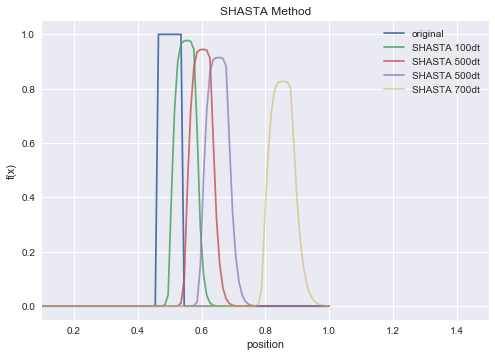

In [61]:
plt.figure()
plt.plot(x,methods[0][0,2:-2],label = 'original')
plt.plot(x,methods[0][100,2:-2],label = 'SHASTA 100dt',alpha = 0.9)
plt.plot(x,methods[0][200,2:-2],label = 'SHASTA 500dt',alpha = .8)
plt.plot(x,methods[0][300,2:-2],label = 'SHASTA 500dt',alpha = 0.7)
plt.plot(x,methods[0][700,2:-2],label = 'SHASTA 700dt',alpha = 0.6)
plt.xlabel('position')
plt.ylabel('f(x)')
plt.xlim([0.1,1.5])
plt.legend()
plt.title("SHASTA Method")
plt.savefig('shasta1.jpg')

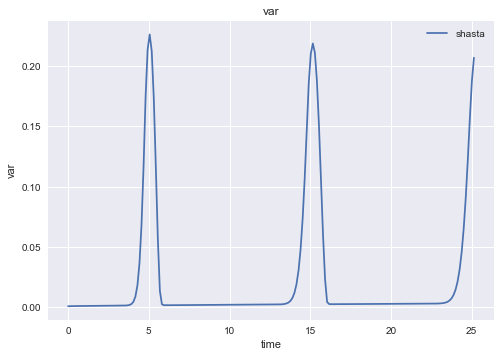

In [68]:
plt.figure()
plt.plot(tt,diags[0][:,2],label = 'shasta')
plt.legend()
plt.xlabel('time')
plt.ylabel('var')
plt.title('var')
plt.savefig('shastavar.jpg')

# Bergers Equation

In [15]:
# declare arrays

nx = 1000
nm = 4
x = np.zeros(nx)
f = np.zeros(nx+2)
fnew = np.zeros(nx+2)
fmom = np.zeros(nm+1)
hmom = np.zeros(nm+1)

main = []
# baseline parameters
Nsteps = 100
nout = 100
sizex = 1.0
dx = sizex/float(nx-1)
mu = 0.3
vel = 0.2

cfl = 0.1
dtd = 1.0
if dif != 0:
    dtd = dx**2/mu
dta = 1.0
if vel != 0:
    dta = dx/vel
dtc = 1.0

dt = cfl*min(min(dta,dtd),dtc)

wid = 20
sigma = wid*dx

for i in range(nx):
    x[i] = dx*float(i)
    xj = (x[i]-sizex/2)/sigma
    f[i+1] = np.exp(-0.5*xj*xj)
main.append(np.copy(f))

for j in range(0,Nsteps):
    f[0] = f[nx]
    f[nx+1] = f[1]
    for k in range(1,nx+1):
        fnew[k] = f[k] + (dt/(2*dx))*(f[k]*f[k+1]-f[k]*f[-1]) + (mu*dt/dx**2)*(f[k+1]-2*f[k]+f[k-1])
    for k in range(nx):
        f[k+1] = fnew[k+1]
    main.append(np.copy(f))

main = np.array(main)



C:\Users\Shaan Desai\Anaconda3\lib\site-packages\ipykernel\__main__.py:44: RuntimeWarning: overflow encountered in double_scalars
C:\Users\Shaan Desai\Anaconda3\lib\site-packages\ipykernel\__main__.py:44: RuntimeWarning: invalid value encountered in double_scalars


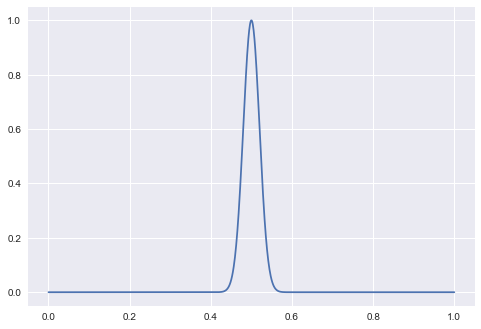

In [16]:
plt.plot(x,main[0,1:-1])

# Burgers+implicit time marching matrix problem

In [5]:
# declare arrays

nx = 100
nm = 4
x = np.zeros(nx)
f = np.zeros(nx)
fnew = np.zeros(nx)
# fmom = np.zeros(nm+1)
# hmom = np.zeros(nm+1)

main = []
# baseline parameters
Nsteps = 1000
nout = 100
sizex = 1.0
dx = sizex/float(nx-1)
mu = 0.3
vel = 2

cfl = 0.1
dtd = 1.0
if dif != 0:
    dtd = dx**2/mu
dta = 1.0
if vel != 0:
    dta = dx/vel
dtc = 1.0

dt = cfl*min(min(dta,dtd),dtc)

wid = 20
sigma = wid*dx

for i in range(nx):
    x[i] = dx*float(i)
    xj = (x[i]-sizex/2)/sigma
    f[i] = np.exp(-0.5*xj*xj)
main.append(np.copy(f))


Amat = np.diag(np.zeros(nx),0) + np.diag(-1*np.ones(nx-1),-1) + np.diag(np.ones(nx-1),1)
Dmat = np.diag(-2*np.ones(nx),0) + np.diag(1*np.ones(nx-1),-1) + np.diag(np.ones(nx-1),1)
djk = np.diag(np.ones(nx),0)

print(np.shape(Amat))
print(np.shape(f.T))
Amat[0,-1] = -1
Amat[-1,0] = 1
Dmat[0,-1] = 1
Dmat[-1,0] = 1
for j in range(0,Nsteps):
    bmat = np.dot((djk + np.dot((dt/dx)*np.diag(f,0),Amat)),f.T)
    fnew = np.linalg.solve((djk-(mu*dt/dx**2)*Dmat),bmat)  
    for k in range(nx):
        f[k] = fnew[k]
    main.append(np.copy(f))

main = np.array(main)



NameError: name 'dif' is not defined

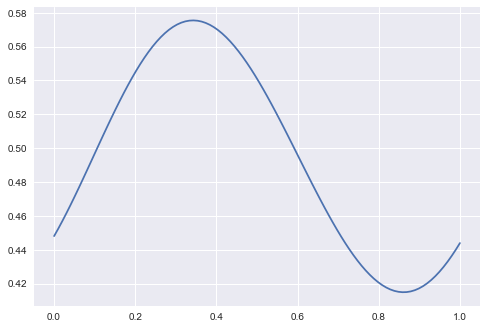

In [41]:
plt.plot(x,main[300,:])

In [1]:

# Burgers from Sauro code

In [3]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
lax = 2
nx = 100
u = np.zeros(nx+2)
unew = np.zeros(nx+2)
main = []
dt   = 0.1
dx   = 1.0
vis  = 0.1
cfl  = 0.1

dtd  = 1.0
if(vis != 0.0):
    dtd = 0.5*dx*dx

NT = 1000
sigma = nx/10
umax  = -9*10**19
for j in range(nx+2):
    x = float(j-nx/2)/sigma
    #u[j]  = np.sin(4*x)
    u[j]  = np.exp(-0.5*x*x)
    if(abs(u[j])>umax):
        umax = abs(u[j])

dta = 1.0
if(umax!=0):
    dta = dx/umax
dt = cfl*min(dta,dtd)
ctre = 1
for t in range(NT):
    u[0]    = u[nx]
    u[nx+1] = u[1]
    for j in range(1,nx+1):
        uj = u[j]
        if(lax == 1):
            uj=0.5*(u[j-1]+u[j+1])
        if(lax == 2):
            uj=(u[j-1]+4.0*u[j]+u[j+1])/6.0

        alfa  = uj*dt/dx
        delta = vis*dt/(dx*dx)
        if ctre == 1:
            print(alfa)
            ctre =2
        a  =  0.5*alfa+delta
        b  = -0.5*alfa+delta
        c  = 1.0-a-b
        unew[j] = a*u[j-1]+c*u[j]+b*u[j+1]

    main.append(np.copy(unew))
    umax = -1*10**19
    
    for k in range(1,nx+1):
        u[k] = unew[k]
        if(abs(u[k]) > umax):
            umax = abs(u[k])
    
    dta  = dx/umax
    dt   = cfl*min(dta,dtd)
    alfa = uj*dt/dx 
    delta = vis*dt/(dx*dx)

    

3.17586911195e-07


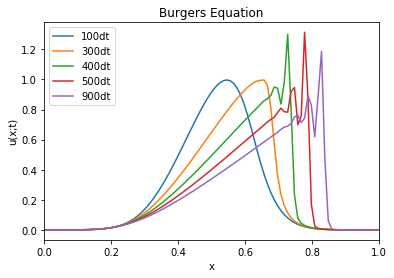

In [4]:
# import matplotlib.pyplot as plt

main = np.array(main)

plt.plot(np.linspace(0,1,100),main[100,1:-1],label = '100dt')
plt.plot(np.linspace(0,1,100),main[300,1:-1],label = '300dt')
plt.plot(np.linspace(0,1,100),main[500,1:-1],label = '400dt')
plt.plot(np.linspace(0,1,100),main[700,1:-1],label = '500dt')
plt.plot(np.linspace(0,1,100),main[900,1:-1],label = '900dt')
plt.xlabel('x')
plt.ylabel('u(x;t)')
plt.title('Burgers Equation')
plt.xlim([0,1])
plt.legend()
plt.savefig('burgerslax2.jpg')